# Contenidos

1. [Introducción](#data1)

2. [Integrantes del grupo y roles](#)

3. [Metodología CRISP-DM](#data3)
    
    3.1. [Comprensión del negocio](#data31)
     
     3.1.1. [Objetivos del proyecto](#data311)

     3.1.2. [Objetivos de Data Science](#data312)
    
    3.2. [Comprensión de los datos](#data32)

     3.2.1.[Recolectar los datos iniciales](#data321)

     3.2.2.[Descripción de los datos](#data322)

     3.2.3.[Exploración de los datos](#data323)

     3.2.4.[Verificar la calidad de los datos](#data324)

    3.3. [Preparacion de los datos](#data33)

     3.3.1. [Limpiar los datos](#data331)

     3.3.2.[Construir los datos](#data332)

     3.3.3.[Requerimientos](#data333)

    3.3. [Modelado](#data34)
    
4. [Conclusiones](#data4)


# **1. Introducción**

En el presente trabajo estamos llevando a cabo un proyecto de analitica de datos para un empresa de marketing que le interesa tener mas informacion sobre los videos que son tendencia en Mexico. El objetivo es analizar los datos y obtener el conocimiento necesario de estos.

# **2. Integrantes del grupo y roles**

In [ ]:
import pandas as pd
import requests
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import plotly.graph_objects as ply
import seaborn as sns

| Integrante           | Rol                      | Responsabilidades                                                                                                                                                              |
|---------------------|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| U202113624 - Achin Angeles, Luciano Valentino   | Business Project Sponsor | - Liderar y promover el progreso del proyecto.                                                            |
| U202122644 - Mendoza Manrique, Emily  | Data Science             | - Analizar los datos y encontrar patrones significativos. <br> - Aplicar técnicas de modelado y comunicar los hallazgos más importantes. |
| U202120058 - Tapia Pescoran, Andrea Katherina | Data Science             | - Analizar datos y encontrar sus patrones aplicando técinas de modelado.|
| U20211A109 - Estrada Fernández, Sara Gabriela     | Data Engineer            | - Limpiar los datos para su futuro análisis.                  |


# **3. Metodología CRISP-DM**

### 3.1 Comprensión del negocio

#### 3.1.1 Objetivos del proyecto

El objetivo de nuestro proyecto es analizar datos acerca de videos en tendencia de Youtube que provienen del pais de Mexico. La finalidad de este es utilizar la metodologia CRISP-DM para poder analizar los datos y crear conocimiento.

Para lograr esto primero necesitamos pre-procesar y procesar los datos para garantizar su calidad. Segundo, necesitamos saber la distribucion de los estados en donde los videos tienen mayor numero de vistas, me gustas y no me gustas. Ademas, de saber los canales que cuenta con la mayor cantidad de videos tendencia.

#### 3.1.2 Objetivos de Data Science

Nuestro objetivo en terminos de de Data Science es poder predecir cuales videos tienen mas posibilidad de recibir la mayor cantidad de likes, me gusta y no me gusta.

### 3.2 Comprensión de los datos

#### 3.2.1. Recolectar los datos iniciales

El dataset que usamos fue proporcionado por Kaggle, una empresa que cuenta con una amplia variedad de datasets. En este caso, cuenta con 44043 videos todos basados en Mexico pero de diferentes canales y categorias. Esta data contiene 19 campos como lo son:

1. video_id: String
2. trending_date: Datetime
3. title:String
4. channel_title: string
5. publish_title: Datetime
6. tags:String
7. views: Int
8. likes:Int
9. dislikes: Int
10. comment_count: Int
11. thumbnail_link:String
12. comments_disabled:Bool
13. ratings_disabled:Bool
14. video_error_or_removed:Bool
15. description:String
16. state:string
17. lat:Int
18. lon:Int
19. geometry:String


#### 3.2.2.Descripción de los datos

| Variable            | Descripción                                                                                                          |
|---------------------|----------------------------------------------------------------------------------------------------------------------|
| video_id                 | Identificación del video                     |
| trending_date            | Fecha en el que el video esta en tendencia   |
| channel_title            | Nombre del canal                             |
| category_id              | Identificador de la categoria                |
| publish_time             | Tiempo de publicacion del video              |
| tags                     | Etiquetas relacionadas a los videos|
| views                    | Conteo de vistas|
| likes                    | Conteo de 'Me Gusta'|
| dislikes                 | Conteo de 'No Me Gusta'|
| comment_count            | Conteo de comentarios|
| thumbnail_link           | Enlace a miniatura del video|
| comments_disabled        | Comentarios habilitados o no (Verdadero o Falso)                     |
| ratings_disabled         | Valuacion habilitada o no (Verdadero o Falso)|
| video_error_or_removed   | Video eliminado/error (Verdadero o Falso)|
| description              | Descripcion del video|
| state                    | Nombre del Estado |
| lat                      | Latitud geográfica de ubicación del Estado|
| lon                      | Longitud geográfica de ubicación del Estado|
| geometry                 | Registrar coordinadas del Estado|

#### 3.2.3. Exploración de los datos

Cargamos la data de un csv llamado MXvideos_cc50_202101

In [ ]:
mexicostats = pd.read_csv('MXvideos_cc50_202101.csv')

Inspeccionar datos

Para esta inspeccion de datos tendremos en cuenta ciertos puntos (arreglar la lista de acuerdo a lo que tenemos)

* [Saber cuantas filas y columnas tiene nuestra data](#criterio1)
* [Nombre de cada columna](#criterio2)
* [El tipo de dato que tiene cada columna](#criterio3)
* [Tablas de frecuencia](#criterio4)

Contenido de la data  <a name="criterio4"></a>

In [ ]:
mexicostats.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24.0,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,FALSO,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514)
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,13/11/2017 0:11,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,FALSO,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316)
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25.0,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,FALSO,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398)
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,FALSO,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418)
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,FALSO,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935)


Verificamos el cargo de la data

In [ ]:
mexicostats.shape

(44043, 20)

20 columnas con 44043 filas

Tipos de datos:

In [ ]:
mexicostats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44043 entries, 0 to 44042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                43959 non-null  object 
 1   trending_date           40593 non-null  object 
 2   title                   40510 non-null  object 
 3   channel_title           40501 non-null  object 
 4   category_id             40451 non-null  float64
 5   publish_time            40451 non-null  object 
 6   tags                    40480 non-null  object 
 7   views                   40451 non-null  float64
 8   likes                   40451 non-null  float64
 9   dislikes                40451 non-null  float64
 10  comment_count           40451 non-null  float64
 11  thumbnail_link          40471 non-null  object 
 12  comments_disabled       40451 non-null  object 
 13  ratings_disabled        40451 non-null  object 
 14  video_error_or_removed  40451 non-null

Nombres de columnas:

In [ ]:
mexicostats.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')

In [ ]:
mexico_num= mexicostats.select_dtypes(include='float64')
mexico_num.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40451.000000,4.045100e+04,4.045100e+04,4.045100e+04,40451.000000,44043.000000,44043.000000
mean,21.003140,3.423820e+05,1.586184e+04,7.471604e+02,2039.660008,21.481515,-100.242120
std,5.878995,1.714691e+06,8.108987e+04,1.095358e+04,13938.031797,3.502304,6.018379
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000,16.429991,-116.009260
25%,20.000000,1.681300e+04,2.990000e+02,1.700000e+01,42.000000,18.920381,-103.500024
50%,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000,20.379982,-99.669999
75%,24.000000,2.068940e+05,7.226000e+03,2.670000e+02,885.000000,22.733353,-98.230010
max,43.000000,1.009124e+08,4.470923e+06,1.353667e+06,905925.000000,30.764051,-86.711455


Tablas de Frecuencia:

In [ ]:
mexicostats.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40451.000000,4.045100e+04,4.045100e+04,4.045100e+04,40451.000000,44043.000000,44043.000000
mean,21.003140,3.423820e+05,1.586184e+04,7.471604e+02,2039.660008,21.481515,-100.242120
std,5.878995,1.714691e+06,8.108987e+04,1.095358e+04,13938.031797,3.502304,6.018379
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000,16.429991,-116.009260
25%,20.000000,1.681300e+04,2.990000e+02,1.700000e+01,42.000000,18.920381,-103.500024
50%,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000,20.379982,-99.669999
75%,24.000000,2.068940e+05,7.226000e+03,2.670000e+02,885.000000,22.733353,-98.230010
max,43.000000,1.009124e+08,4.470923e+06,1.353667e+06,905925.000000,30.764051,-86.711455


Visualizar datos

In [ ]:
colores = ['blue', 'green', 'red', 'orange', 'purple']

In [ ]:
tabla_frecuencia_categoria = mexicostats['category_id'].value_counts()
fig = ply.Figure(data=[ply.Pie(labels=tabla_frecuencia_categoria.index, values=tabla_frecuencia_categoria.values)])

fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Distribucion de categorias</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    showlegend=True,
    width=700,
    height=700
)
fig.show()

In [ ]:
tabla = []
for categorias, frecuencia in tabla_frecuencia_categoria.items():
    tabla.append([categorias, frecuencia])

pd.DataFrame(tabla, columns=['Categorias', 'Cantidad'])

,Categorias,Cantidad
0,24.0,13487
1,22.0,8159
2,17.0,4050
3,10.0,3371
4,25.0,3113
5,26.0,2467
6,23.0,1742
7,1.0,1298
8,20.0,994
9,27.0,532


#### 3.2.4.Verificar la calidad de los datos

In [ ]:
mexicostats.isna().sum()

video_id                    84
trending_date             3450
title                     3533
channel_title             3542
category_id               3592
publish_time              3592
tags                      3563
views                     3592
likes                     3592
dislikes                  3592
comment_count             3592
thumbnail_link            3572
comments_disabled         3592
ratings_disabled          3592
video_error_or_removed    3592
description               7797
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

*---->16 de 20 columnas contienen elementos NA.*

<Axes: >

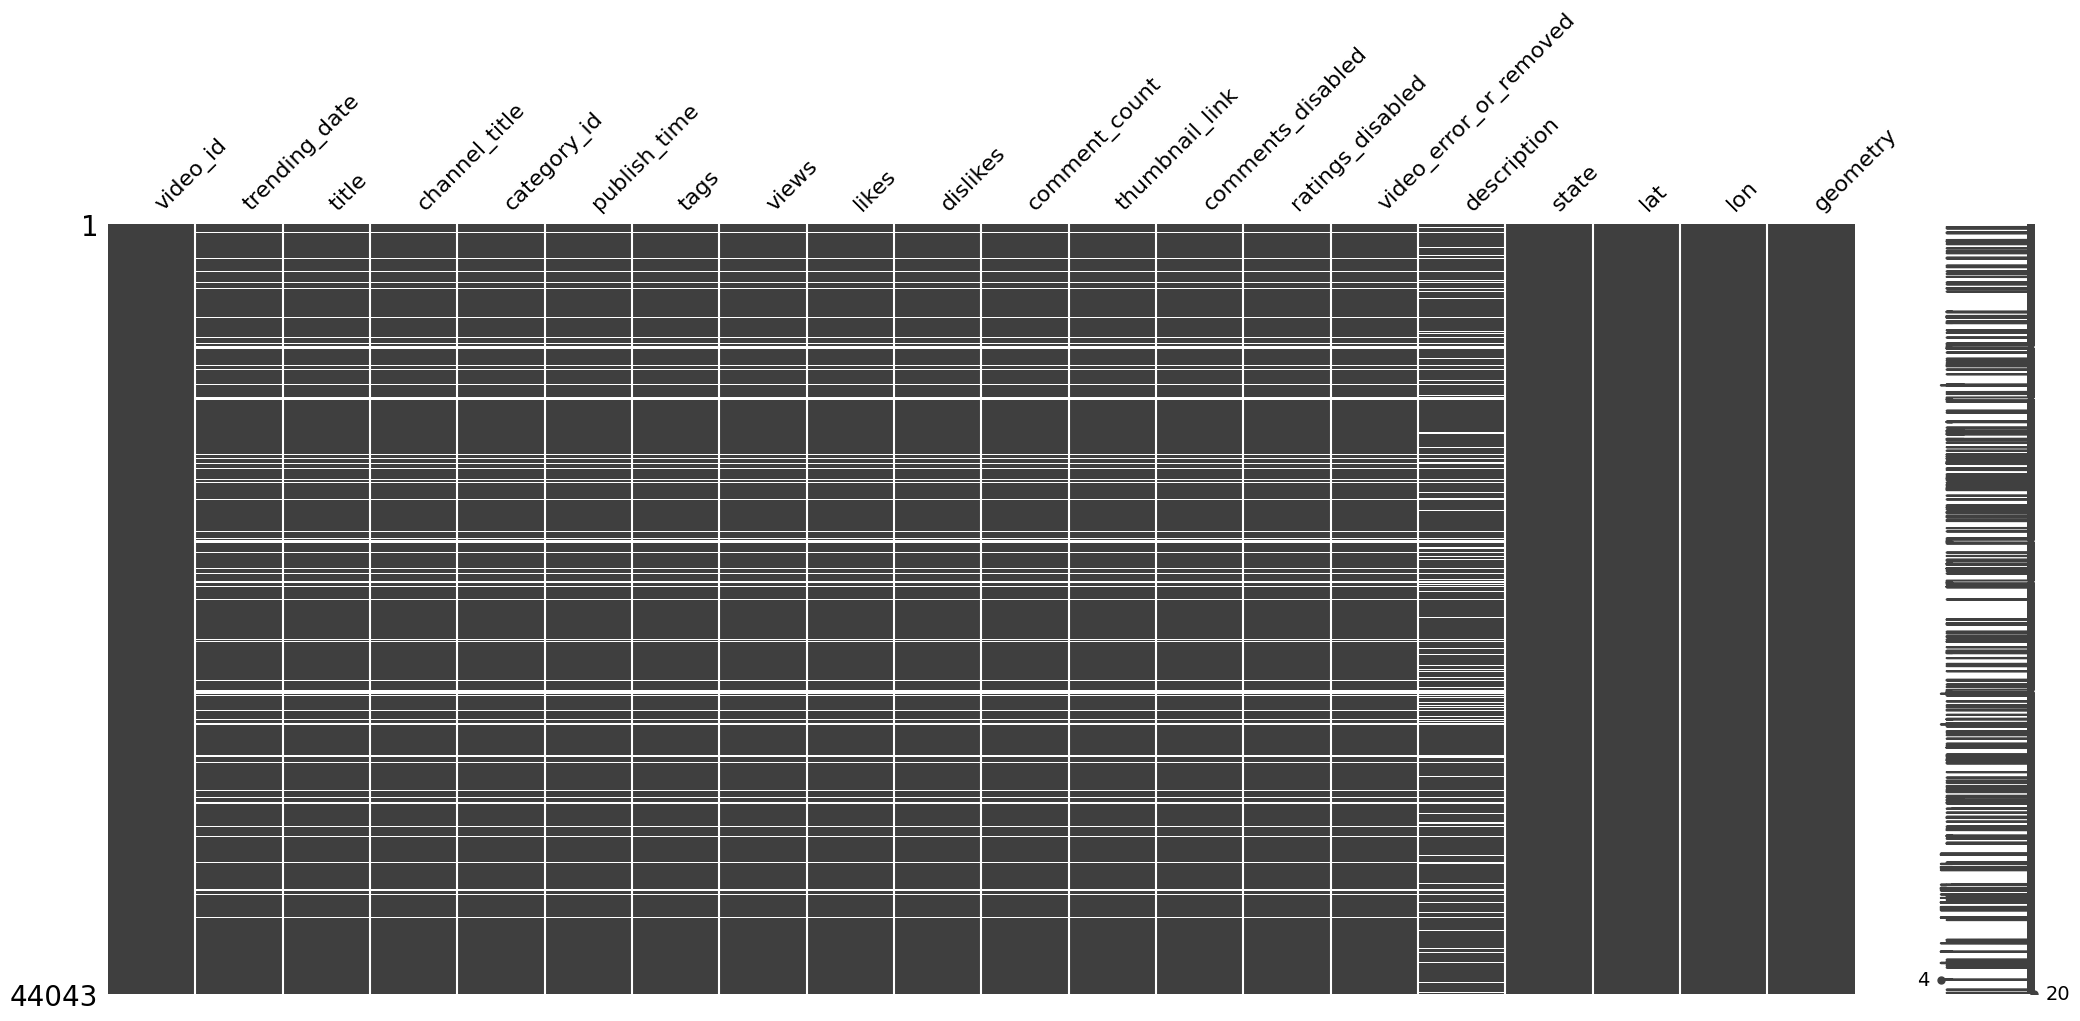

In [ ]:
msno.matrix(mexicostats)

In [ ]:
null_counts = mexicostats.isnull().sum()
fig = ply.Figure(data= ply.Bar(x=null_counts.index, y=null_counts.values))
fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Valores nulos o vacios por columna</span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    xaxis_title='Columna',
    yaxis_title='Cantidad de Valores Nulos'
)
fig.show()

In [ ]:
columnas_verificar = ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags','views','likes','dislikes','comment_count','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description']
registros_vacios = mexicostats[mexicostats[columnas_verificar].isnull().any(axis=1)]

registros_vacios['User ID'] = registros_vacios.index
registros_vacios.rename(columns={'User ID': 'ID de Usuario'})

<ipython-input-131-002d85459866>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,ID de Usuario
56,mevdRfjbwH4,17.14.11,Leslie mar vs Mayela Without you - la voz Méxi...,Pablo Zarate,29.0,13/11/2017 0:11,[none],15814.0,91.0,5.0,...,https://i.ytimg.com/vi/mevdRfjbwH4/default.jpg,FALSO,FALSO,FALSO,NaN,Sinaloa,23.199991,-106.230038,POINT (-106.2300381 23.19999086),56
71,5Dimg9RM4Lo,17.14.11,Maru Dueñas le escribió un último mensaje a An...,Los Capitanes HD Capellan,24.0,12/11/2017 6:47,"Maru Dueñas|""escribió""|""último mensaje""|""Angel...",87525.0,171.0,37.0,...,https://i.ytimg.com/vi/5Dimg9RM4Lo/default.jpg,FALSO,FALSO,FALSO,NaN,Yucatan,21.099990,-89.279987,POINT (-89.27998743000001 21.09998985),71
74,s-VstUmpPzM,17.14.11,TERREMOTO 7.6 EN IRAK 2017 ALERTA MUNDIAL,ALERTA MUNDIAL,22.0,12/11/2017 15:35,[none],34707.0,97.0,28.0,...,https://i.ytimg.com/vi/s-VstUmpPzM/default.jpg,FALSO,FALSO,FALSO,NaN,Chihuahua,26.933355,-105.666636,POINT (-105.6666358 26.93335472),74
79,bbFsQ3QuJAc,17.14.11,Vuelo de la victoria final parte 1,tutosbells2,22.0,12/11/2017 21:35,"vuelo la victoria|""final""|""greatsnovels""",149799.0,816.0,167.0,...,https://i.ytimg.com/vi/bbFsQ3QuJAc/default.jpg,FALSO,FALSO,FALSO,NaN,Tabasco,18.400025,-93.229979,POINT (-93.22997888 18.40002545),79
84,LT4qAHRqrjU,17.14.11,La Voz México 2017 capítulo 5 completo,Reviews Film,22.0,13/11/2017 8:44,[none],26416.0,167.0,21.0,...,https://i.ytimg.com/vi/LT4qAHRqrjU/default.jpg,FALSO,FALSO,FALSO,NaN,Zacatecas,22.350017,-102.880010,POINT (-102.88001 22.35001691),84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44005,rNeqzJkFeQY,18.14.06,FALLECE ARKANGEL LUCHADOR DEL CMLL,El Rincón del Wrestling,24.0,13/06/2018 16:38,[none],13460.0,132.0,4.0,...,https://i.ytimg.com/vi/rNeqzJkFeQY/default.jpg,FALSO,FALSO,FALSO,NaN,Oaxaca,16.429991,-95.019999,POINT (-95.01999882 16.42999066),44005
44008,LP8si0deHHA,18.14.06,BTS (방탄소년단) - ANPANMAN (BT21 DEBUT STAGE) @ PR...,2018 BTS FESTA,22.0,13/06/2018 8:25,[none],560983.0,65650.0,143.0,...,https://i.ytimg.com/vi/LP8si0deHHA/default.jpg,FALSO,FALSO,FALSO,NaN,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316),44008
44019,9E87FN1odi8,18.14.06,HIJAS DE LA LUNA CAPÍTULO FINAL PARTE 10,Dennis Fanny,23.0,11/06/2018 0:49,[none],37089.0,220.0,16.0,...,https://i.ytimg.com/vi/9E87FN1odi8/default.jpg,FALSO,FALSO,FALSO,NaN,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316),44019
44025,sXD2KISlVro,18.14.06,Gregoria EN DIRECTO Miércoles,gregoria perez perez,22.0,13/06/2018 21:15,[none],18507.0,703.0,24.0,...,https://i.ytimg.com/vi/sXD2KISlVro/default.jpg,VERDADERO,FALSO,FALSO,NaN,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316),44025




---



### 3.3. Preparacion de los datos

#### 3.3.1. Limpiar los datos

En esta primera parte del preprocesamiento, se identifican los valores NULL o "" y los convertimos a NA, Con el fin de sustituirlos por una tendencia central como la mediana o la moda.

***Verificamos la cantidad de filas antes de que nuestro dataset sea limpiado***

In [ ]:
filas_antes = mexicostats.shape[0]
print(f'Número de filas antes de la limpieza: {filas_antes}')
mexicostats.head()

Número de filas antes de la limpieza: 44043


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24.0,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,FALSO,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514)
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,13/11/2017 0:11,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,FALSO,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316)
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25.0,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,FALSO,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398)
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,FALSO,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418)
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,FALSO,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935)


***Encontramos estadísticas descriptivas de las columnas***

In [ ]:
print(mexicostats.describe())

        category_id         views         likes      dislikes  comment_count  \
count  40451.000000  4.045100e+04  4.045100e+04  4.045100e+04   40451.000000   
mean      21.003140  3.423820e+05  1.586184e+04  7.471604e+02    2039.660008   
std        5.878995  1.714691e+06  8.108987e+04  1.095358e+04   13938.031797   
min        1.000000  1.570000e+02  0.000000e+00  0.000000e+00       0.000000   
25%       20.000000  1.681300e+04  2.990000e+02  1.700000e+01      42.000000   
50%       24.000000  5.697300e+04  1.246000e+03  6.300000e+01     196.000000   
75%       24.000000  2.068940e+05  7.226000e+03  2.670000e+02     885.000000   
max       43.000000  1.009124e+08  4.470923e+06  1.353667e+06  905925.000000   

                lat           lon  
count  44043.000000  44043.000000  
mean      21.481515   -100.242120  
std        3.502304      6.018379  
min       16.429991   -116.009260  
25%       18.920381   -103.500024  
50%       20.379982    -99.669999  
75%       22.733353    -98.

***Contamos los valores nulos (NULL)***

In [ ]:
print(mexicostats.isnull().sum())

video_id                    84
trending_date             3450
title                     3533
channel_title             3542
category_id               3592
publish_time              3592
tags                      3563
views                     3592
likes                     3592
dislikes                  3592
comment_count             3592
thumbnail_link            3572
comments_disabled         3592
ratings_disabled          3592
video_error_or_removed    3592
description               7797
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64


De acuerdo al análisis de los datos, se encuentra que:

*   video_id contiene letras y números. Aparte de los id encriptados, contiene líneas como "/n" que son comentarios, por lo que estas filas vacías y las que contengan un video_id con "/n" deben ser elimadas.

Para esto, se toman:
1.   trending_date
2.   title
3.   channel_title
4.   thumbnail_link
5.   publish_time

Puesto que, si estas se encuentran vacías, significa que no es un video.

Un video no necesariamente cuenta con tags, descripción, estado, comentarios desactivados, etc. Por lo tanto, no se borrarán, pero estas que tengan un NULL serán próximamente rellenadas.




***Se indentifican los valores '' o NULL dentro de las demás columnas de nuestro dataset y se reemplazan por NA utilizando pd.NA para su próxima sustitución con data***

In [ ]:
mexicostats.replace('', pd.NA, inplace=True)
mexicostats.replace('NULL', pd.NA, inplace=True)

***Primero eliminamos las filas con video_id vacíos***

In [ ]:
mexicostats.dropna(subset=['video_id'], inplace=True)

***Ahora eliminamos las filas con un trending_date vacío para quitar los no videos***

mexicostats.dropna(subset=['trending_date'], inplace=True)

***Seguimos con title, channel_title y thumbnail_link***

In [ ]:
mexicostats.dropna(subset=['title'], inplace=True)
mexicostats.dropna(subset=['channel_title'], inplace=True)
mexicostats.dropna(subset=['thumbnail_link'], inplace=True)
mexicostats.dropna(subset=['publish_time'], inplace=True)

***Ciertas columnas, como views, likes, dislikes, comments_disabled, ratings_disabled, video_error_or_removed, no tienen que ser rellenadas con la media, puesto que un video con 0 likes no va a tener 20 de repente por ser la media, debería quedarse con 0***

In [ ]:
columnas_a_imputar_con_cero = ['views', 'likes', 'dislikes', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
mexicostats[columnas_a_imputar_con_cero] = mexicostats[columnas_a_imputar_con_cero].fillna(0)

***Ahora se rellenan los valores NA restantes con data usando la mediana***

In [ ]:
mexicostats.fillna(mexicostats.median(), inplace=True)

<ipython-input-139-8e907fdd9bc1>:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



***Verificamos la limpieza de data***

In [ ]:
mexicostats.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               4224
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [ ]:
print(mexicostats.isnull().sum())

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               4224
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64


***Un video no necesariamente cuenta con descripción. Por lo tanto, pueden quedarse las columnas con valores vacíos***

***Verificamos el dataset luego de la limpieza y el conteo de las filas luego de hacerse efectiva la limpieza***

In [ ]:
filas_despues = mexicostats.shape[0]
print(f'Número de filas después de la limpieza: {filas_despues}')
mexicostats

Número de filas después de la limpieza: 40451


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24.0,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,FALSO,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514)
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,13/11/2017 0:11,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,FALSO,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316)
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25.0,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,FALSO,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398)
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,FALSO,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418)
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,FALSO,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44038,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17.0,13/06/2018 8:11,"Canal|""Oficial""|""da""|""Federação""|""Portuguesa""|...",653114.0,65639.0,547.0,3826.0,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,FALSO,FALSO,FALSO,Portugal's Football Team Official SongLyrics: ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514)
44039,i7r_kMbyngk,18.14.06,AMLO llegó con su esposa al Tercer Debate en M...,AMX,25.0,12/06/2018 20:15,"AMLO|""morena""|""política""|""PRI""|""PAN""|""PRD""|""Ló...",121674.0,3558.0,58.0,491.0,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,FALSO,FALSO,FALSO,AMLO llegó con su esposa al Tercer Debate en M...,Veracruz,17.939976,-94.739990,POINT (-94.73999007 17.93997601)
44040,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii ¿adorable o ridícula?,Historias Wink,24.0,13/06/2018 10:08,"maire|""maire vs el internet""|""maire vs interne...",14067.0,538.0,6.0,90.0,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,FALSO,FALSO,FALSO,Maire usa una blusa kawaii de Alicia en el paí...,Nuevo Leon,25.189999,-99.839989,POINT (-99.83998885 25.1899986)
44041,pAH9omNAWA4,18.14.06,La Jefa del Campeón - Capítulo 2 Parte 3/4,Tele Time,22.0,12/06/2018 21:22,[none],22898.0,94.0,11.0,3.0,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,FALSO,FALSO,FALSO,NaN,Baja California Sur,26.013333,-111.351664,POINT (-111.3516635 26.01333335)


####3.3.2.Construir nuevos datos

***Agregamos la columna de sentimientos para una mayor solucion a las preguntas propuestas***

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
inicializador = SentimentIntensityAnalyzer()

**Con el inicializador aplicamos a la columna title en "sentiment intensity analizer" para que este sea clasificado**

In [ ]:
mexicostats['sentiment'] = mexicostats['title'].apply(lambda x: inicializador.polarity_scores(str(x))['compound'])

**Ya que esto se categoriza con 0s y 1s, cambiamos a categorias mejor reconocibles: positivo, negativo y neutro**

In [ ]:
mexicostats['sentiment'] = mexicostats['sentiment'].apply(lambda x: 'positivo' if x > 0 else ('negativo' if x < 0 else 'neutral'))

***Verificamos que haya sido aplicado***

In [ ]:
mexicostats['sentiment'].unique()

array(['neutral', 'negativo', 'positivo'], dtype=object)

In [ ]:
mexicostats[mexicostats['sentiment'] != 'neutral']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,sentiment
8,uijjYNtl_UM,17.14.11,7 Niños Famosos Que No Supieron Adaptarse a La...,Los mejores Top 10,24.0,12/11/2017 14:54,"los mejores top 10|""top 10 niños""|""top 10""|""to...",371110.0,20155.0,912.0,...,https://i.ytimg.com/vi/uijjYNtl_UM/default.jpg,FALSO,FALSO,FALSO,7 Niños Famosos Que No Supieron Adaptarse a La...,Puebla,18.900021,-98.449996,POINT (-98.44999618 18.90002077),negativo
9,cOJ68MQm2ac,17.14.11,TOP: Los 7 libros infantiles más perturbadores...,DrossRotzank,24.0,12/11/2017 16:14,"libros infantiles|""Dross""|""terror""|""horror""|""m...",1111314.0,83582.0,2194.0,...,https://i.ytimg.com/vi/cOJ68MQm2ac/default.jpg,FALSO,FALSO,FALSO,Actualizo 3 veces por semana. Si el video te g...,Chihuahua,26.933355,-105.666636,POINT (-105.6666358 26.93335472),positivo
12,yhdI98_O-Xc,17.14.11,Disney Challenge - feat. Luis Angel Gomez / Mi...,Memo Aponte,22.0,12/11/2017 20:50,"memo aponte coco|""memo aponte voces""|""memo apo...",127796.0,13293.0,216.0,...,https://i.ytimg.com/vi/yhdI98_O-Xc/default.jpg,FALSO,FALSO,FALSO,"Fui hasta Leon, Guanajuato para conocer y comp...",Morelos,18.921105,-99.240000,POINT (-99.23999963999999 18.92110476),positivo
17,238T-LaO_IM,17.14.11,Termina Telenovela Las Malcriadas sin Pena ni...,Chacaleo. Com,24.0,13/11/2017 9:00,"Telenovela malcriadas final|""Telenovela malcri...",47789.0,776.0,143.0,...,https://i.ytimg.com/vi/238T-LaO_IM/default.jpg,FALSO,FALSO,FALSO,"Finalmente, las grabaciones de la telenovela “...",Oaxaca,16.429991,-95.019999,POINT (-95.01999882 16.42999066),negativo
22,GR1Af3ZG-lE,17.14.11,The Walking Dead 8 Temporada Episódio 4 (LEGEN...,#Victor Daniel,22.0,13/11/2017 7:14,"The Walking Dead|""Dublado""|""Legendado""|""TWD""|""...",194758.0,4085.0,182.0,...,https://i.ytimg.com/vi/GR1Af3ZG-lE/default.jpg,FALSO,FALSO,FALSO,SEGUNDO CANAL VÃO LÁ CASO PERCO ESSE : \nhttp...,Mexico,19.410015,-99.029987,POINT (-99.02998660999999 19.41001548),negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44021,L6JFnZ5WabM,18.14.06,Top 5 candidatos que te darán Pena Ajena l Top...,Tops Al Chile!,24.0,12/06/2018 14:49,"candidatos presidenciales 2018|""candidatos pre...",141734.0,5012.0,207.0,...,https://i.ytimg.com/vi/L6JFnZ5WabM/default.jpg,FALSO,FALSO,FALSO,Facebook: https://www.facebook.com/topsalchile...,Sonora,27.580008,-109.929993,POINT (-109.9299931 27.58000775),positivo
44028,iFItPMcJRDo,18.14.06,No me digas - Episodio 37 - Hábitos:Niño Vs Ad...,Franco Escamilla,23.0,13/06/2018 8:05,"La|""mesa""|""reñoña""|""Franco""|""Escamilla""|""Comed...",51717.0,2024.0,94.0,...,https://i.ytimg.com/vi/iFItPMcJRDo/default.jpg,FALSO,FALSO,FALSO,Recuerda descargar la aplicación oficial de Fr...,Nuevo Leon,25.189999,-99.839989,POINT (-99.83998885 25.1899986),negativo
44033,NOcJ6L6cFyo,18.14.06,Best ★ GOLDEN BUZZERS ★ 2018 | America's Got T...,MusicTalentNow,24.0,13/06/2018 15:27,"Best GOLDEN BUZZERS 2018|""golden buzzer 2018""|...",114264.0,1430.0,93.0,...,https://i.ytimg.com/vi/NOcJ6L6cFyo/default.jpg,FALSO,FALSO,FALSO,► CLICK HERE to Learn How To SingTips To Impro...,Guanajuato,20.670016,-101.499991,POINT (-101.4999909 20.67001609),positivo
44034,e1OaQtzSoDw,18.14.06,Sin Senos Si Hay Paraíso 3 | Capítulo 1 | Tele...,Telemundo,24.0,13/06/2018 1:23,"Sin Senos Sí Hay Paraíso 3|""Primer Capítulo""|""...",501195.0,4349.0,324.0,...,https://i.ytimg.com/vi/e1OaQtzSoDw/default.jpg,FALSO,FALSO,FALSO,Full Episode:http://www.telemundo.com/series-y...,Guanajuato,20.670016,-101.499991,POINT (-101.4999909 20.67001609),negativo


Arreglamos data a ser utlizada, ej. category_id esta en formato float y la necesitamos en int para realizar algunos modelamientos.

In [ ]:
mexicostats['category_id'] = mexicostats['category_id'].astype(int)

####3.3.3.Requerimientos

**Por Categoría de Videos**

---



1. ¿Qué categorías de videos son las de mayor tendencia?

In [ ]:
categorias_ordenadas = mexicostats.groupby('category_id')['views'].count().sort_values(ascending=False)

In [ ]:
fig = ply.Figure()
fig.add_trace(ply.Pie(labels=categorias_ordenadas.index, values=categorias_ordenadas.values))
fig.update_layout(title='Categoría de videos con mayor tendencia')
fig.show()

2.   ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?


In [ ]:
likecatego = mexicostats.groupby('category_id')['likes'].sum().reset_index()

In [ ]:
fig = ply.Figure(data=[ply.Bar(x=likecatego['category_id'], y=likecatego['likes'])])
fig.update_layout(
    xaxis_title='Categoría',
    yaxis_title='Cantidad de "me gusta"',
    title='Categoria de videos con mayor "me gusta"',
    template='ggplot2',
    width=700,
    height=550
)
fig.show()

In [ ]:
likecatego.sort_values(by='likes', ascending=True)

,category_id,likes
15,43,491.0
5,19,897709.0
3,15,990508.0
12,27,2550632.0
14,29,2908413.0
1,2,2980893.0
13,28,5114569.0
10,25,11910414.0
0,1,17915248.0
6,20,24002503.0


In [ ]:
dislikecatego = mexicostats.groupby('category_id')['dislikes'].sum().reset_index()

In [ ]:
fig = ply.Figure(data=[ply.Bar(x=dislikecatego['category_id'], y=dislikecatego['dislikes'])])
fig.update_layout(
    xaxis_title='Categoría',
    yaxis_title='Cantidad de "no me gusta"',
    title='Categoria de videos con mayor "no me gusta"',
    template='ggplot2',
    width=700,
    height=550
)
fig.show()

In [ ]:
dislikecatego

,category_id,dislikes
0,1,516653.0
1,2,83752.0
2,10,7957335.0
3,15,63713.0
4,17,1279451.0
5,19,26253.0
6,20,938239.0
7,22,3219558.0
8,23,2400688.0
9,24,11139060.0


3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

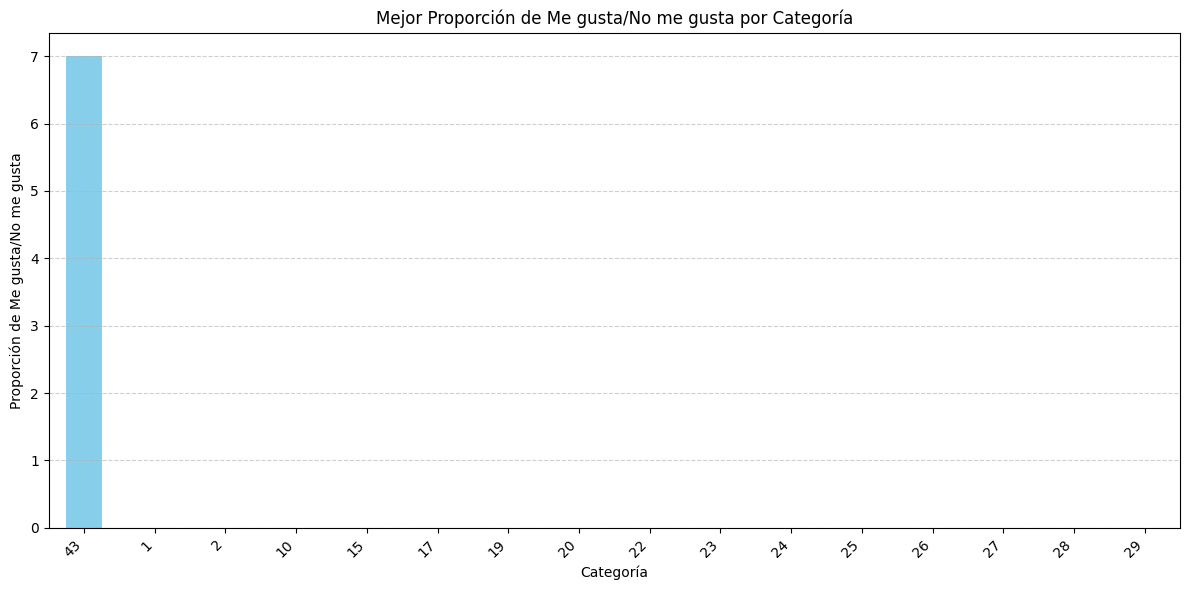

In [ ]:
mexicostats['likes_dislikes_ratio'] = mexicostats['likes'] / mexicostats['dislikes']
categoryld_ratios = mexicostats.groupby('category_id')['likes_dislikes_ratio'].mean()
ascratio = categoryld_ratios.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ascratio.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Proporción de Me gusta/No me gusta')
plt.title('Mejor Proporción de Me gusta/No me gusta por Categoría')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?


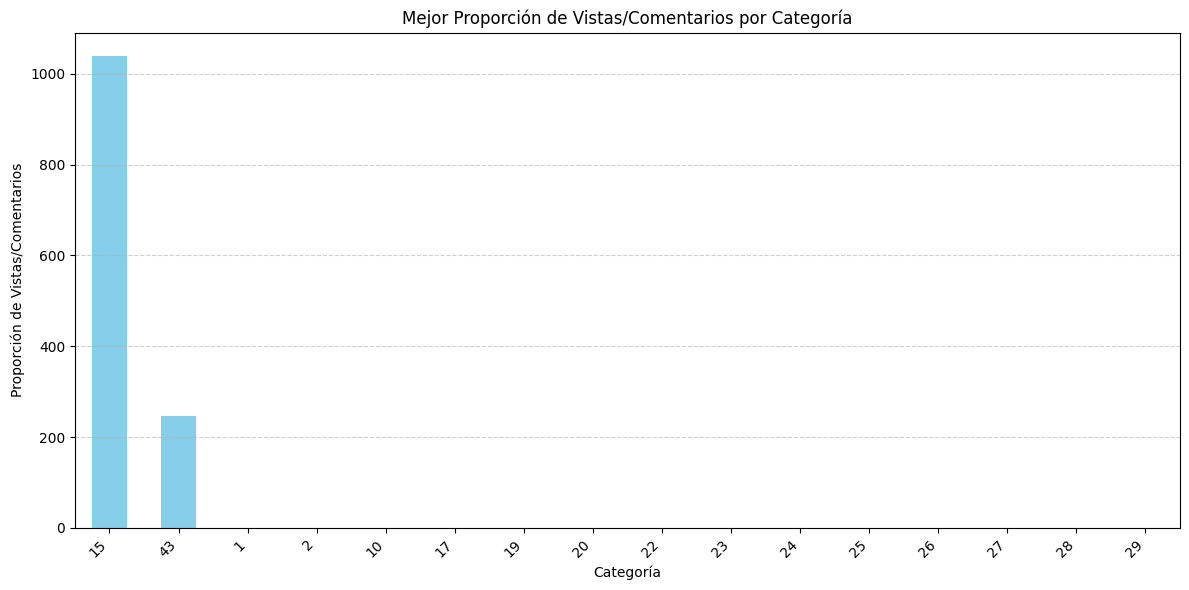

In [ ]:
import matplotlib.pyplot as plt

# Calcular la proporción de Vistas/Comentarios y agregarla como una nueva columna
mexicostats['views_comments_ratio'] = mexicostats['views'] / mexicostats['comment_count']

# Agrupar por la columna 'category_id' y calcular el promedio de la proporción para cada categoría
category_ratios = mexicostats.groupby('category_id')['views_comments_ratio'].mean()

# Ordenar las categorías según la proporción promedio en orden descendente
sorted_categories = category_ratios.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sorted_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Proporción de Vistas/Comentarios')
plt.title('Mejor Proporción de Vistas/Comentarios por Categoría')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Por el tiempo transcurrido**

---



5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

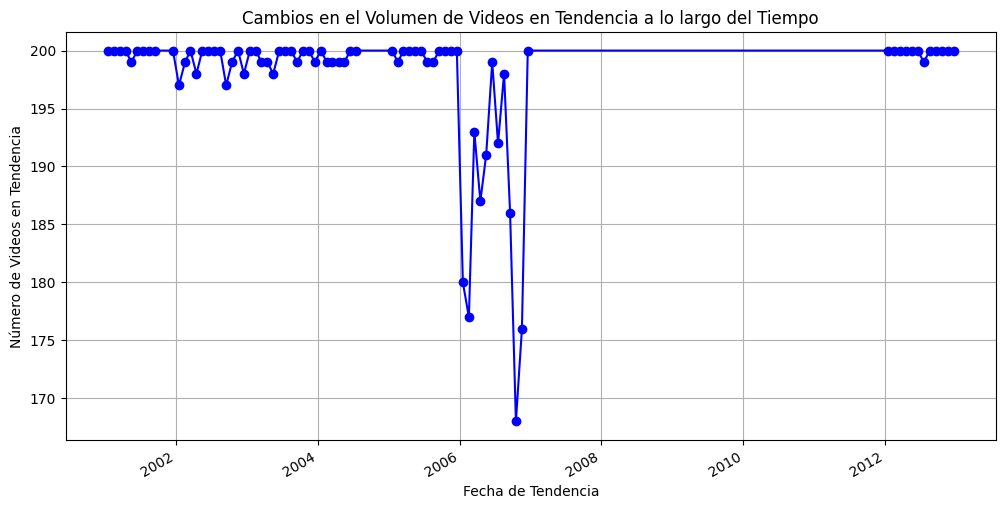

In [ ]:
# Convertir la columna 'trending_date' a formato de fecha si no está en ese formato
mexicostats['trending_date'] = pd.to_datetime(mexicostats['trending_date'], errors='coerce')


# Agrupar y contar el número de videos por día
videos_por_dia = mexicostats.groupby('trending_date').size()

# Crear un gráfico de línea para visualizar el cambio en el tiempo
plt.figure(figsize=(12, 6))
videos_por_dia.plot(kind='line', color='blue', marker='o')
plt.title('Cambios en el Volumen de Videos en Tendencia a lo largo del Tiempo')
plt.xlabel('Fecha de Tendencia')
plt.ylabel('Número de Videos en Tendencia')
plt.grid(True)
plt.show()


**Por Canales de YouTube**

---



6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menosfrecuencia?

Canales con mayor frecuencia en videos en tendencia:
Cracks                  186
Badabun                 184
Troom Troom Es          168
Cracks MX               162
Las Estrellas           155
Televisa Telenovelas    149
El Salvador 4K          145
Tu COSMOPOLIS           143
Enamorándonos           136
Ventaneando             133
Name: channel_title, dtype: int64


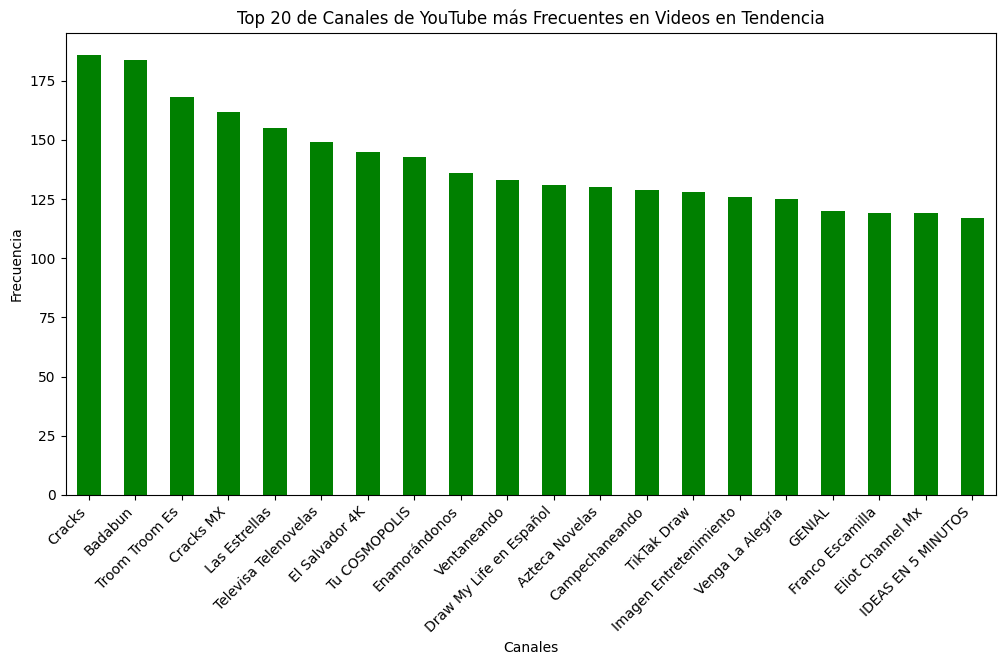


Canales con menor frecuencia en videos en tendencia:
AlvarezCrack                          1
Ese Mi Ismaelo_Official               1
HOLA!4u                               1
PajaritaBella                         1
Leonardo Aguilar                      1
Bandai Namco Entertainment America    1
Khaleesi                              1
Marco Antonio Soriano Pérez           1
Telehit Comedy Nights                 1
FPFutebolOficial                      1
Name: channel_title, dtype: int64


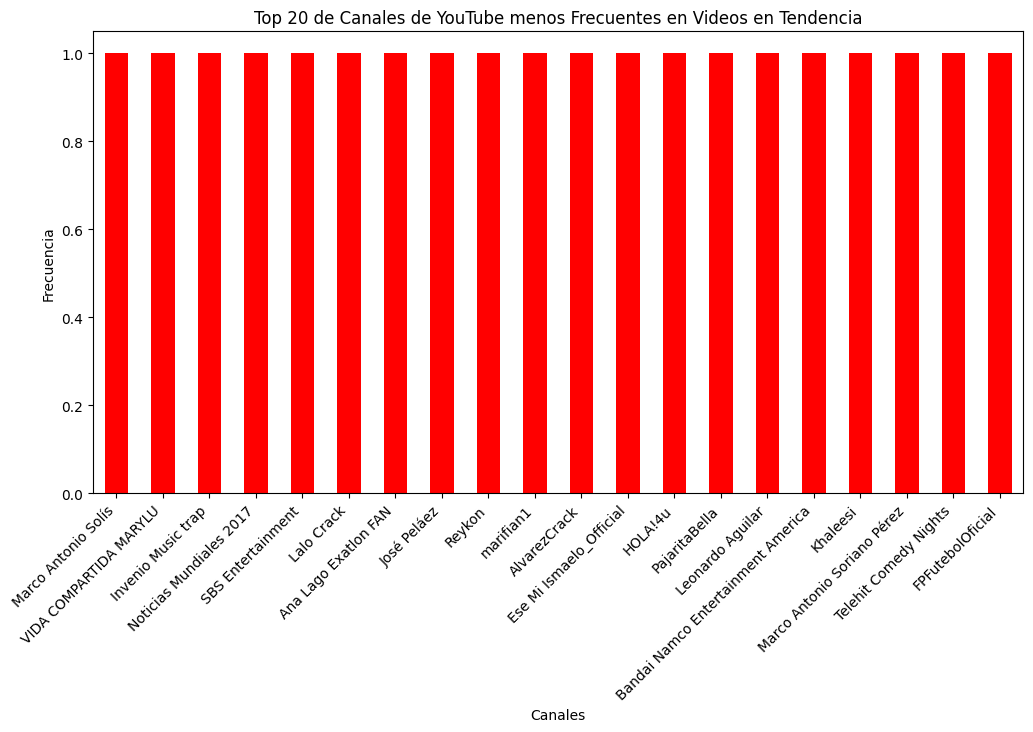

In [ ]:
frecuencia_canales = mexicostats['channel_title'].value_counts()

print("Canales con mayor frecuencia en videos en tendencia:")
print(frecuencia_canales.head(10))

plt.figure(figsize=(12, 6))
frecuencia_canales.head(20).plot(kind='bar', color='green')
plt.title('Top 20 de Canales de YouTube más Frecuentes en Videos en Tendencia')
plt.xlabel('Canales')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

print("\nCanales con menor frecuencia en videos en tendencia:")
print(frecuencia_canales.tail(10))

plt.figure(figsize=(12, 6))
frecuencia_canales.tail(20).plot(kind='bar', color='red')
plt.title('Top 20 de Canales de YouTube menos Frecuentes en Videos en Tendencia')
plt.xlabel('Canales')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


**Por la geografía del país**

---



7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?


In [ ]:
mxTotal=mexicostats.groupby("state",as_index=False).agg({"views":"sum",
                                                 "likes":"sum",
                                                 "dislikes":"sum"})

mxTotal.head()

,state,views,likes,dislikes
0,Aguascalientes,402648634.0,19198404.0,840109.0
1,Baja California,503384409.0,21090305.0,762277.0
2,Baja California Sur,303374161.0,15276286.0,637922.0
3,Campeche,442934874.0,21329902.0,826010.0
4,Chiapas,455488228.0,22421954.0,743954.0


In [ ]:
regions_url='https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mx_regions=requests.get(regions_url).json()

In [ ]:
choromap=px.choropleth(data_frame= mxTotal,
                       title='Mexico- Vistas en Videos de Youtube por Estado',
                       geojson=mx_regions,
                       locations='state',
                       color='views',
                       featureidkey='properties.name')

choromap.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
choromap.show()

In [ ]:
choromap=px.choropleth(data_frame= mxTotal,
                        title='Mexico- Likes en Videos de Youtube por Estado',
                       geojson=mx_regions,
                       locations='state',
                       color='likes',
                       featureidkey='properties.name')

choromap.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
choromap.show()

In [ ]:
choromap=px.choropleth(data_frame= mxTotal,
                       geojson=mx_regions,
                       title='Mexico- Dislikes en Videos de Youtube por Estado',
                       locations='state',
                       color='dislikes',
                       featureidkey='properties.name')

choromap.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
choromap.show()

9. ¿Los videos en tendencia son los que tienen titulos positivos?


In [ ]:
mex_Trend=mexicostats.groupby(["sentiment"], as_index=False).agg({"trending_date":"count"})
mex_Trend


,sentiment,trending_date
0,negativo,1669
1,neutral,12237
2,positivo,1314


In [ ]:
fig = ply.Figure(data=[ply.Pie(labels=mex_Trend["sentiment"], values=mex_Trend["trending_date"])])

fig.update_layout(
    title={
        'text': '<b><span style="font-family: Little Pat; font-size: 20px;color: black;">Sentimientos en titulos de videos en tendencia </span></b>',
        'x': 0.5,
        'y': 0.95,
    },
    showlegend=True,
    width=500,
    height=500
)
fig.show()


###3.4. Modelizar y evaluar los resultados

El proyecto de Data Mining que buscamos resolver es predecir el numero de "Vistas", "Me Gusta" y "No Me Gusta". Debido a que el proyecto es de prediccion, vamos a escoger el entrenamiento de un modelo de regresion logistica multiclases. A partir de este modelo buscaremos comprobar si existe una relacion las variables de entrada y las variables de salida.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import metrics

#### Views

Empezamos considerando la variable views como la variable objetiva de estudio y obtenemos las variables que necesitamos que seria category_id, comment_count, comments_disabled, ratings_disabled, state, dislikes y likes. Para poder usar el metodo de regresion logistica convertimos las variables comments_disabled y ratings_disabled en booleanas y la variable state en columnas categoricas.

In [ ]:
c = pd.cut(mexicostats[['views']].stack(), [0.0, 0.4*10**6, 1.0*10**7, 3.5*10**7], labels=['bajo', 'medio', 'alto'])
df_views = mexicostats.join(c.unstack().add_suffix('_cat'))
df_views = df_views[['category_id', 'views_cat', 'likes', 'dislikes', 'comment_count',"comments_disabled","ratings_disabled","state"]].dropna()
df_views["comments_disabled"]=df_views["comments_disabled"].map({'FALSO':0, 'VERDADERO':1})
df_views["ratings_disabled"]=df_views["ratings_disabled"].map({'FALSO':0, 'VERDADERO':1})

o=[]
for i in df_views.columns:
    if df_views[i].dtype=='object':
        o.append(i)

df_views=pd.get_dummies(df_views,columns=o)


In [ ]:
df_views.head()

,category_id,views_cat,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state_Aguascalientes,state_Baja California,state_Baja California Sur,...,state_Quintana Roo,state_San Luis Potosi,state_Sinaloa,state_Sonora,state_Tabasco,state_Tamaulipas,state_Tlaxcala,state_Veracruz,state_Yucatan,state_Zacatecas
0,24,bajo,4182.0,361.0,1836.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,22,bajo,271.0,174.0,369.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,bajo,10105.0,266.0,607.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,bajo,378.0,171.0,208.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,medio,57781.0,681.0,7428.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dividimos el conjunto de datos en datos de entrenamiento (train) y datos de prueba(test)

In [ ]:
X_trainV, X_testV, y_trainV, y_testV = train_test_split(df_views.drop('views_cat', axis=1), df_views['views_cat'], test_size=0.30, random_state=101)


Entrenamos el modelo de regresion logistico

In [ ]:
logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000) #Parametros utilizados para problemas con multiclases
logmodel.fit(X_trainV,y_trainV)


LogisticRegression(max_iter=1000, multi_class='multinomial')

Evaluamos el modelo de regresion logista que predice la variable views.

In [ ]:
predictions = logmodel.predict(X_testV)
print(classification_report(y_testV, predictions))


              precision    recall  f1-score   support

        alto       0.57      0.39      0.46        44
        bajo       0.94      0.96      0.95     10293
       medio       0.70      0.63      0.66      1793

    accuracy                           0.91     12130
   macro avg       0.74      0.66      0.69     12130
weighted avg       0.90      0.91      0.90     12130



Segun el reporte de clasificacion la proporcion de prediciones que son verdaderas para la clase de views alta es un 57%, para la clase baja es un 94% y para la clase media es un 70%. Ademas, podemos afirmar que la proporcion de verdaderos positivos que que se identifican como tales es 39% en la clase alta, un 96% en la clase baja y un 63% en la clase media.

#### Likes

Segundo, considerando la variable likes como la variable objetiva de estudio y obtenemos las variables que necesitamos que seria category_id, comment_count, comments_disabled, ratings_disabled, state, dislikes y views. Para poder usar el metodo de regresion logistica convertimos las variables comments_disabled y ratings_disabled en booleanas y la variable state en columnas categoricas.

In [ ]:
c = pd.cut(mexicostats[['likes']].stack(), [0.0, 0.1*10**5, 0.1*10**6, 1.5*10**6], labels=['bajo', 'medio', 'alto'])
df_likes = mexicostats.join(c.unstack().add_suffix('_cat'))
df_likes = df_likes[['category_id', 'likes_cat', 'views', 'dislikes', 'comment_count',"comments_disabled","ratings_disabled","state"]].dropna()
df_likes["comments_disabled"]=df_likes["comments_disabled"].map({'FALSO':0, 'VERDADERO':1})
df_likes["ratings_disabled"]=df_likes["ratings_disabled"].map({'FALSO':0, 'VERDADERO':1})

o=[]
for i in df_likes.columns:
    if df_likes[i].dtype=='object':
        o.append(i)

df_likes=pd.get_dummies(df_likes,columns=o)

In [ ]:
df_likes.head()

,category_id,likes_cat,views,dislikes,comment_count,comments_disabled,ratings_disabled,state_Aguascalientes,state_Baja California,state_Baja California Sur,...,state_Quintana Roo,state_San Luis Potosi,state_Sinaloa,state_Sonora,state_Tabasco,state_Tamaulipas,state_Tlaxcala,state_Veracruz,state_Yucatan,state_Zacatecas
0,24,bajo,310130.0,361.0,1836.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,22,bajo,104972.0,174.0,369.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,medio,136064.0,266.0,607.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,bajo,96153.0,171.0,208.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,medio,499965.0,681.0,7428.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dividimos el conjunto de datos en datos de entrenamiento (train) y datos de prueba(test)

In [ ]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(df_likes.drop('likes_cat', axis=1), df_likes['likes_cat'], test_size=0.30, random_state=101)


Entrenamos el modelo de regresion logistico

In [ ]:
logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logmodel.fit(X_trainL,y_trainL)

LogisticRegression(max_iter=1000, multi_class='multinomial')

Evaluamos el modelo de regresion logista que predice la variable likes

In [ ]:
predictions = logmodel.predict(X_testL)
print(classification_report(y_testL, predictions))


              precision    recall  f1-score   support

        alto       0.04      0.97      0.07       336
        bajo       0.95      0.29      0.45      9498
       medio       0.00      0.00      0.00      2104

    accuracy                           0.26     11938
   macro avg       0.33      0.42      0.17     11938
weighted avg       0.76      0.26      0.36     11938



Segun el reporte de clasificacion la proporcion de prediciones que son verdaderas para la clase de likes alta es un 4%, para la clase baja es un 95% y para la clase media no se puedo predecir. Ademas, podemos afirmar que la proporcion de verdaderos positivos que se identifican como tales es 97% en la clase alta, un 29% en la clase baja y no hay en la clase media. Entonces podemos afirmar que el modelo es relativamente bueno prediciendo el numero de likes en un video.

#### Dislikes

La ultima variable que consideramos es la variable dislikes. Obtenemos las variables que necesitamos que seria category_id, comment_count, comments_disabled, ratings_disabled, state, likes y views. Para poder usar el metodo de regresion logistica convertimos las variables comments_disabled y ratings_disabled en booleanas y la variable state en columnas categoricas.

In [ ]:
c = pd.cut(mexicostats[['dislikes']].stack(), [0.0, 0.8*10**3, 8*10**3, 200*10**3], labels=['bajo', 'medio', 'alto'])
df_dislikes = mexicostats.join(c.unstack().add_suffix('_cat'))

df_dislikes = df_dislikes[['category_id', 'dislikes_cat', 'views', 'likes', 'comment_count',"comments_disabled","ratings_disabled","state"]].dropna()
df_dislikes["comments_disabled"]=df_dislikes["comments_disabled"].map({'FALSO':0, 'VERDADERO':1})
df_dislikes["ratings_disabled"]=df_dislikes["ratings_disabled"].map({'FALSO':0, 'VERDADERO':1})

o=[]
for i in df_dislikes.columns:
    if df_dislikes[i].dtype=='object':
        o.append(i)

df_dislikes=pd.get_dummies(df_dislikes,columns=o)

In [ ]:
df_dislikes.head()

,category_id,dislikes_cat,views,likes,comment_count,comments_disabled,ratings_disabled,state_Aguascalientes,state_Baja California,state_Baja California Sur,...,state_Quintana Roo,state_San Luis Potosi,state_Sinaloa,state_Sonora,state_Tabasco,state_Tamaulipas,state_Tlaxcala,state_Veracruz,state_Yucatan,state_Zacatecas
0,24,bajo,310130.0,4182.0,1836.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,22,bajo,104972.0,271.0,369.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,bajo,136064.0,10105.0,607.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,bajo,96153.0,378.0,208.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,bajo,499965.0,57781.0,7428.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dividimos el conjunto de datos en datos de entrenamiento (train) y datos de prueba(test)

In [ ]:
X_trainD, X_testD, y_trainD, y_testD = train_test_split(df_dislikes.drop('dislikes_cat', axis=1), df_dislikes['dislikes_cat'], test_size=0.30, random_state=101)


Entrenamos el modelo de regresion logistico

In [ ]:
logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logmodel.fit(X_trainD,y_trainD)

LogisticRegression(max_iter=1000, multi_class='multinomial')

Evaluamos el modelo de regresion logista que predice la variable dislikes.

In [ ]:
predictions = logmodel.predict(X_testD)
print(classification_report(y_testD, predictions))

              precision    recall  f1-score   support

        alto       0.25      0.01      0.03       145
        bajo       0.94      0.96      0.95     10392
       medio       0.57      0.51      0.54      1299

    accuracy                           0.90     11836
   macro avg       0.59      0.50      0.50     11836
weighted avg       0.89      0.90      0.90     11836



Segun el reporte de clasificacion la proporcion de prediciones que son verdaderas para la clase de dislikes alta es un 25%, para la clase baja es un 94% y para la clase media es un 57%. Ademas, podemos afirmar que la proporcion de verdaderos positivos que se identifican como tales es 1% en la clase alta, un 96% en la clase baja y un 51% en la clase media.Entonces se sabe que el modelo no es bueno prediciendo si los dislikes son altos pero si es bueno prediciendo si los dislikes son bajos o medianos.

In [ ]:
mexicostats.to_csv('Nuevo_mexicostats.csv')

In [ ]:
from google.colab import files
files.download('Nuevo_mexicostats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##4. Conclusiones

Segun las graficas que hemos desarrollado podemos concluir que

*   Al analizar los datos por categoria encontramos que la categoria con más videos en tendencia es la categoria 24 de entretenimiento. Además, la categoria con la mayor cantidad de 'Me Gusta' es la categoria 10 de musica y la categoria con la menor cantidad es la categoria 43 'shows'.Por último, la categoria con la mejor proporcion de me gusta/no me gusta es la categoria 43 y la categoria con mejor proporcion vistas/comentarios es la categoria 15.
*   Si analizamos como ha cambiado el volumen de videos a lo largo de los años podemos ver que hubo un gran decremento de videos en tendencia entre el 2006 y el 2008. En hubieron menos 170 videos en tendencia.
*   Al analizar los canales podemos ver que los canales que estan mayormente en tendencia son Cracks y Badabun. Mientras que los canales que son tendencia con menos frecuencia son Los Perms RoberT J. Miller, Fox News Channel, Enigmatika Visión, odisseomx,Vik Moto TV,EVANHD,Las Tepidol,MUJER LUNA BELLA y Magnus Mefisto.
*   Si analizamos por estados se sabe que el estado de Coahuila tiene la mayor cantidad de videos vistos con más de 264 millones. El estado Sonora de tiene la mayor cantidad 'Me Gusta' con más de 11 millones. Por último, el estado que tiene la mayor cantidad de 'No Me Gusta' es Veracruz con solo un millon.
*   Al analizar los titulos en los videos podemos afirmar que la mayoria de videos cuentan con titulos neutrales y solo el 8,63% tiene titulos positivos.
*   Utilizando el modelo de regresión logistica podemos afirmar que en el caso de los likes y dislikes el modelo no puedo predecir exactamente cuantos likes o dislikes va tener un video. Sin embargo, en el caso de los views el modelo si los puede predecir con más presición.


